# Laboratory exercise 4

## Warm-Up Mode (2 points)

**Task Description**  
Using the given dataset, develop and implement **3** different neural networks to predict the **air quality level**. Each network should differ in the following ways:  

- **layer configurations** - use different numbers and types of layers;
- **activation functions** - try different activation functions;
- **neurons per layer** - experiment with different numbers of neurons in each layer; and
- **number of layers** - build networks with varying depths.

After developing the models, evaluate and compare the performance of all **3** approaches.

**About the Dataset**  
This dataset focuses on air quality assessment across various regions. The dataset contains 5,000 samples and captures critical environmental and demographic factors that influence pollution levels.

**Features**:  
- **Temperature (°C)**: Average temperature of the region.  
- **Humidity (%)**: Relative humidity recorded in the region.  
- **PM2.5 Concentration (µg/m³)**: Levels of fine particulate matter.  
- **PM10 Concentration (µg/m³)**: Levels of coarse particulate matter.  
- **NO2 Concentration (ppb)**: Nitrogen dioxide levels.  
- **SO2 Concentration (ppb)**: Sulfur dioxide levels.  
- **CO Concentration (ppm)**: Carbon monoxide levels.  
- **Proximity to Industrial Areas (km)**: Distance to the nearest industrial zone.  
- **Population Density (people/km²)**: Number of people per square kilometer in the region.  

**Target Variable**: **Air Quality**  
- **Good**: Clean air with low pollution levels.  
- **Moderate**: Acceptable air quality but with some pollutants present.  
- **Poor**: Noticeable pollution that may cause health issues for sensitive groups.  
- **Hazardous**: Highly polluted air posing serious health risks to the population.  

In [141]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from keras.api.models import Sequential
from keras.api.layers import Input, LSTM, Dense
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
import numpy as np


In [142]:
df = pd.read_csv("pollution_dataset.csv")
df

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good
...,...,...,...,...,...,...,...,...,...,...
4995,40.6,74.1,116.0,126.7,45.5,25.7,2.11,2.8,765,Hazardous
4996,28.1,96.9,6.9,25.0,25.3,10.8,1.54,5.7,709,Moderate
4997,25.9,78.2,14.2,22.1,34.8,7.8,1.63,9.6,379,Moderate
4998,25.3,44.4,21.4,29.0,23.7,5.7,0.89,11.6,241,Good


In [143]:
len(df)

5000

In [144]:
cats=df.columns
cats.drop('Air Quality')
encoder = LabelEncoder()
df['Air Quality'] = encoder.fit_transform(df['Air Quality'])
# sns.pairplot(df, vars=cats, hue='Air Quality')

In [145]:
x, y = df.drop(columns=["Air Quality"]), df["Air Quality"]

In [146]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, random_state=1)
train_y.unique()

array([1, 2, 3, 0])

In [147]:
scaler = MinMaxScaler()
train_X = scaler.fit_transform(train_x)
test_X = scaler.transform(test_x)

In [148]:
model1 = Sequential([
    Input(shape=(x.shape[1],)),
    Dense(64, kernel_initializer="uniform", activation="relu"),
    Dense(32, kernel_initializer="uniform", activation="relu"),
    Dense(4, kernel_initializer="uniform", activation="softmax"),
])

model1.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

In [149]:
history1 = model1.fit(train_X, train_y, validation_split=0.1, epochs=32, batch_size=8)

Epoch 1/32
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 796us/step - accuracy: 0.5689 - loss: 1.0398 - val_accuracy: 0.9200 - val_loss: 0.3014
Epoch 2/32
450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 641us/step - accuracy: 0.9109 - loss: 0.2665 - val_accuracy: 0.9150 - val_loss: 0.2208
Epoch 3/32
450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 656us/step - accuracy: 0.9295 - loss: 0.1942 - val_accuracy: 0.9300 - val_loss: 0.2023
Epoch 4/32
450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 665us/step - accuracy: 0.9257 - loss: 0.2054 - val_accuracy: 0.9275 - val_loss: 0.1883
Epoch 5/32
450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 697us/step - accuracy: 0.9393 - loss: 0.1784 - val_accuracy: 0.9050 - val_loss: 0.2221
Epoch 6/32
450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 644us/step - accuracy: 0.9324 - loss: 0.1858 - val_accuracy: 0.9300 - val_loss: 0.1808
Epoch 7/32
450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - accuracy: 0.9280 - loss: 0.1821 - val_accuracy: 0.9350 - val_loss: 0.1817
Epoch 8/32
450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 660us/step - accuracy: 0.9352 - loss: 0.1624 - 

<Axes: >

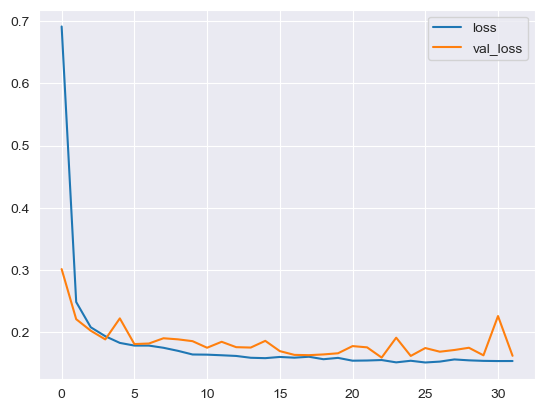

In [150]:
sns.lineplot(history1.history['loss'], label='loss')
sns.lineplot(history1.history['val_loss'], label='val_loss')

In [151]:
pred_y1 = model1.predict(test_X).round()
pred_y1 = np.argmax(pred_y1, axis=1)
test_y

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


2764    2
4767    0
3814    1
3499    2
2735    3
       ..
448     0
921     2
4087    2
1242    3
2242    3
Name: Air Quality, Length: 1000, dtype: int32

In [152]:
print(classification_report(test_y, pred_y1))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       404
           1       0.86      0.84      0.85       100
           2       0.93      0.97      0.95       296
           3       0.88      0.83      0.85       200

    accuracy                           0.94      1000
   macro avg       0.91      0.91      0.91      1000
weighted avg       0.94      0.94      0.94      1000



In [159]:
model2 = Sequential([
    Input(shape=(x.shape[1],)),
    Dense(64, kernel_initializer="normal", activation="relu"),
    Dense(32, kernel_initializer="normal", activation="relu"),
    Dense(4, kernel_initializer="normal", activation="softmax"),
])

model2.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)
history2 = model2.fit(train_X, train_y, validation_split=0.1, epochs=8, batch_size=8)

Epoch 1/8
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 808us/step - accuracy: 0.5240 - loss: 1.0869 - val_accuracy: 0.9100 - val_loss: 0.3215
Epoch 2/8
450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 668us/step - accuracy: 0.9061 - loss: 0.2936 - val_accuracy: 0.9250 - val_loss: 0.2337
Epoch 3/8
450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 608us/step - accuracy: 0.9263 - loss: 0.2317 - val_accuracy: 0.9025 - val_loss: 0.2545
Epoch 4/8
450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 613us/step - accuracy: 0.9311 - loss: 0.1992 - val_accuracy: 0.9275 - val_loss: 0.2024
Epoch 5/8
450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 677us/step - accuracy: 0.9378 - loss: 0.1749 - val_accuracy: 0.9325 - val_loss: 0.1816
Epoch 6/8
450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 615us/step - accuracy: 0.9381 - loss: 0.1694 - val_accuracy: 0.9275 - val_loss: 0.2023
Epoch 7/8
450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 607us/step - accuracy: 0.9276 - loss: 0.1765 - val_accuracy: 0.9225 - val_loss: 0.1855
Epoch 8/8
450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 629us/step - accuracy: 0.9394 - loss: 0.1646 - val_accu

<Axes: >

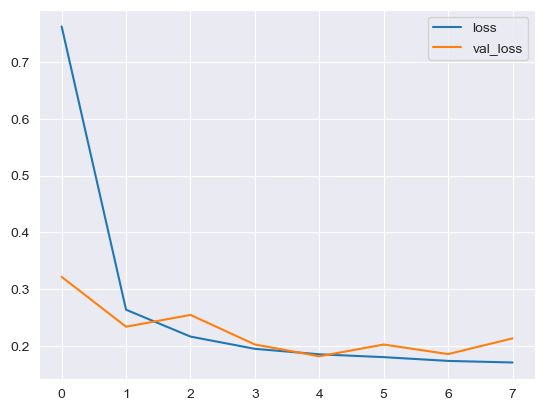

In [160]:
sns.lineplot(history2.history['loss'], label='loss')
sns.lineplot(history2.history['val_loss'], label='val_loss')

In [161]:
pred_y2 = model1.predict(test_X).round()
pred_y2 = np.argmax(pred_y2, axis=1)
print(classification_report(test_y, pred_y2))

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 505us/step
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       404
           1       0.86      0.84      0.85       100
           2       0.93      0.97      0.95       296
           3       0.88      0.83      0.85       200

    accuracy                           0.94      1000
   macro avg       0.91      0.91      0.91      1000
weighted avg       0.94      0.94      0.94      1000



In [156]:
model3 = Sequential([
    Input(shape=(x.shape[1],)),
    Dense(64, kernel_initializer="normal", activation="elu"),
    Dense(32, kernel_initializer="normal", activation="elu"),
    Dense(16, kernel_initializer="normal", activation="elu"),
    Dense(4, kernel_initializer="normal", activation="softmax"),
])

model3.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)
history3 = model3.fit(train_X, train_y, validation_split=0.1, epochs=64, batch_size=8)

Epoch 1/64
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 856us/step - accuracy: 0.5735 - loss: 0.9178 - val_accuracy: 0.9175 - val_loss: 0.2263
Epoch 2/64
450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 658us/step - accuracy: 0.9165 - loss: 0.2309 - val_accuracy: 0.8475 - val_loss: 0.3190
Epoch 3/64
450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 639us/step - accuracy: 0.9168 - loss: 0.1984 - val_accuracy: 0.9325 - val_loss: 0.1848
Epoch 4/64
450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 679us/step - accuracy: 0.9366 - loss: 0.1607 - val_accuracy: 0.9250 - val_loss: 0.1903
Epoch 5/64
450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 701us/step - accuracy: 0.9420 - loss: 0.1635 - val_accuracy: 0.9400 - val_loss: 0.1783
Epoch 6/64
450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 697us/step - accuracy: 0.9472 - loss: 0.1380 - val_accuracy: 0.9325 - val_loss: 0.1717
Epoch 7/64
450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 671us/step - accuracy: 0.9336 - loss: 0.1631 - val_accuracy: 0.9350 - val_loss: 0.1920
Epoch 8/64
450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 680us/step - accuracy: 0.9349 - loss: 0.1738 - 

<Axes: >

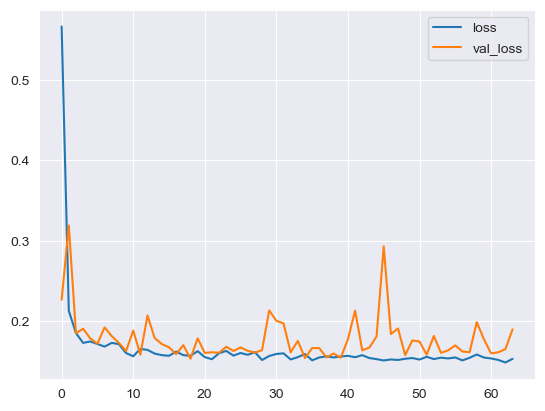

In [157]:
sns.lineplot(history3.history['loss'], label='loss')
sns.lineplot(history3.history['val_loss'], label='val_loss')

In [158]:
pred_y3 = model1.predict(test_X).round()
pred_y3 = np.argmax(pred_y3, axis=1)
print(classification_report(test_y, pred_y3))

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 570us/step
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       404
           1       0.86      0.84      0.85       100
           2       0.93      0.97      0.95       296
           3       0.88      0.83      0.85       200

    accuracy                           0.94      1000
   macro avg       0.91      0.91      0.91      1000
weighted avg       0.94      0.94      0.94      1000

